In [4]:
import os
import re
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('../../clean_txt_data.csv')


In [6]:
data= data.dropna()

In [7]:
def plot_times(input_df,keyword, graph_title): 
    keywordtimes=[]
    for idx in input_df.index: #search through all papertext
        txt = input_df.content[idx]
        if keyword in txt: #looking for keyword 'incubation'
            for line in txt.split(". "): #split papertext into sentences
                if keyword in line: #find all sentences with keyword
                    times=re.findall(r'([0-9]+,*\.*[0-9]*) *-* *(?:days|day)', line) #search for time references in days within matched sentences (allows for weird punctuation found within some papers)
                    for time in times: #loop thru matched times
                        keywordtimes.append(int(float(re.sub('[^0-9]','', time)))) #convert to ints and add to array (float then int to prevent invalid literal errors)
    delidxs=[] #store an array of indices to remove
    remcnt=0 
    for idx,time in enumerate(keywordtimes): #loop thru incubation times
        if time > 24 or time < 2: #remove extreme data points
            delidxs.append(idx) #add index of extreme point to array
    for index in delidxs: #loop thru indices to remove
        del keywordtimes[index-remcnt] #remove from array (remcnt variable accounts for incides shifting -1 once some are removed)
        remcnt=remcnt+1
        
    y = np.array(keywordtimes) #array -> numpy array

    plt.hist(y,color="#400080"); #histogram plot
    plt.grid(axis='y', alpha=0.75) 

    plt.xlabel('Time (days)')

    plt.ylabel('Frequency')

    plt.title(graph_title)

    plt.text(30,60,'avg: '+str(y.mean()),fontsize=14) #display average

    plt.axvline(y.mean(), color='k', linestyle='dashed', linewidth=1) #avg line
    plt.show() #show plot


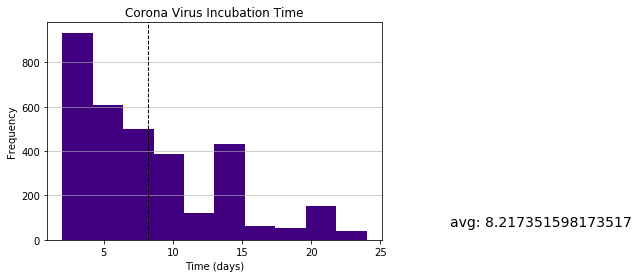

In [114]:
incub_df = data[data.content.str.contains('incubation')].copy()
plot_times(incub_df,'incubation', 'Corona Virus Incubation Time')

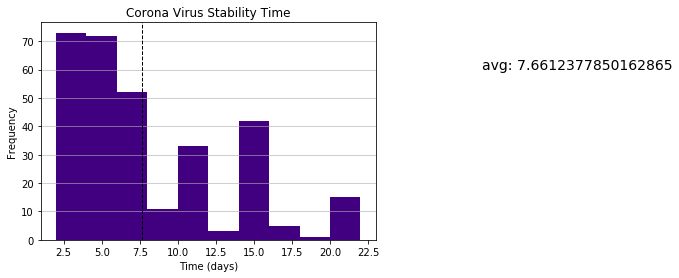

In [117]:
confinement_df = data[data.content.str.contains('stable')].copy()
plot_times(confinement_df,'stable', 'Corona Virus Stability Time')